In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_32/1759593133.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Train set

In [11]:
pd.set_option('display.max_rows', 4)

train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train = pd.DataFrame(train)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


MSSubClass: Identifies the type of dwelling involved in the sale.

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property.

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

In [12]:
nan_counts = df_train.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
df_train.shape

(1460, 81)

In [18]:
pd.set_option('display.max_rows', None)
print(df_train.dtypes)
pd.set_option('display.max_rows', 6)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [19]:
df_train_filt = df_train.dropna(axis=1)

nan_counts = df_train_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [20]:
df_train_filt.shape

(1460, 62)

In [21]:
X = df_train_filt.copy()
y = X.pop("SalePrice")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [22]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

minfo_gen = mutual_info_classif(X, y.values.ravel())
binfo_gen = mutual_info_regression(X, y)

In [23]:
minfo = minfo_gen
binfo = binfo_gen

In [25]:
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, MI: {binfo[i]}")

Feature: Id, MI: 0.0
Feature: MSSubClass, MI: 0.048222983915747974
Feature: MSZoning, MI: 0.10839152837924249
Feature: LotArea, MI: 0.0936165697947553
Feature: Street, MI: 0.0051914939364516854
Feature: LotShape, MI: 0.08793916256323309
Feature: LandContour, MI: 0.02959361598084187
Feature: Utilities, MI: 0.012624163277394684
Feature: LotConfig, MI: 0.010495655259861847
Feature: LandSlope, MI: 0.01642198235807224
Feature: Neighborhood, MI: 0.12552147549351655
Feature: Condition1, MI: 0.016135579764521735
Feature: Condition2, MI: 0.0
Feature: BldgType, MI: 0.03500689626583098
Feature: HouseStyle, MI: 0.04476966839366803
Feature: OverallQual, MI: 0.5051922094022716
Feature: OverallCond, MI: 0.1111148917462157
Feature: YearBuilt, MI: 0.282780370823728
Feature: YearRemodAdd, MI: 0.20587608719731065
Feature: RoofStyle, MI: 0.012650094466564621
Feature: RoofMatl, MI: 0.009772871800658445
Feature: Exterior1st, MI: 0.01572193925933174
Feature: Exterior2nd, MI: 0.06859897197876541
Feature: Exte

In [26]:
binfo_df = pd.DataFrame(binfo)
binfo_df.rename(columns = {0:'MI'}, inplace = True)
binfo_df['Features'] = X.columns

In [40]:
minfo_df = pd.DataFrame(minfo)
minfo_df.rename(columns = {0:'MI'}, inplace = True)
minfo_df['Features'] = X.columns

In [41]:
binfo_df

,MI,Features
15,0.505192,OverallQual
36,0.378202,GrLivArea
47,0.353550,GarageCars
...,...,...
27,0.000000,BsmtFinSF2
57,0.000000,MoSold
0,0.000000,Id


In [42]:
minfo_df

,MI,Features
0,0.189849,Id
1,0.480011,MSSubClass
2,0.143633,MSZoning
...,...,...
58,0.342284,YrSold
59,0.031488,SaleType
60,0.057112,SaleCondition


In [39]:
binfo_df = binfo_df.sort_values(by ='MI', ascending = False)
binfo_df

,MI,Features
15,0.505192,OverallQual
36,0.378202,GrLivArea
47,0.353550,GarageCars
...,...,...
27,0.000000,BsmtFinSF2
57,0.000000,MoSold
0,0.000000,Id


In [44]:
minfo_df = minfo_df.sort_values(by='MI', ascending=False)
minfo_df

,MI,Features
42,3.679537,KitchenAbvGr
23,2.187704,ExterQual
47,2.111546,GarageCars
...,...,...
7,0.000000,Utilities
6,0.000000,LandContour
38,0.000000,BsmtHalfBath


In [33]:
def plot_mi(df, sort_name, y_name, title):
    df = df.sort_values(by=sort_name, ascending=True)
    width = np.arange(len(df))
    tick = list(df[y_name])
    plt.barh(width, df[sort_name])
    plt.yticks(width, tick)
    plt.title(title)
    plt.show()

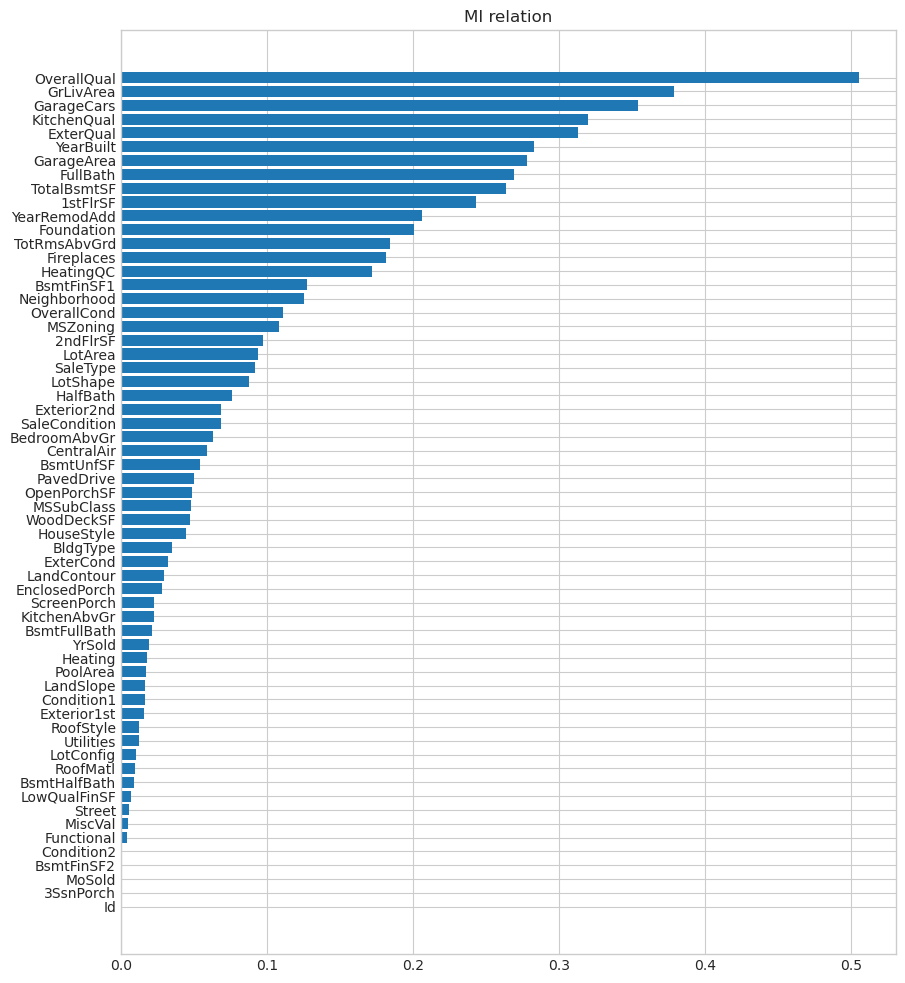

In [34]:
plt.figure(dpi=100, figsize=(10, 12))
plot_mi(binfo_df, 'MI', 'Features', "MI relation")

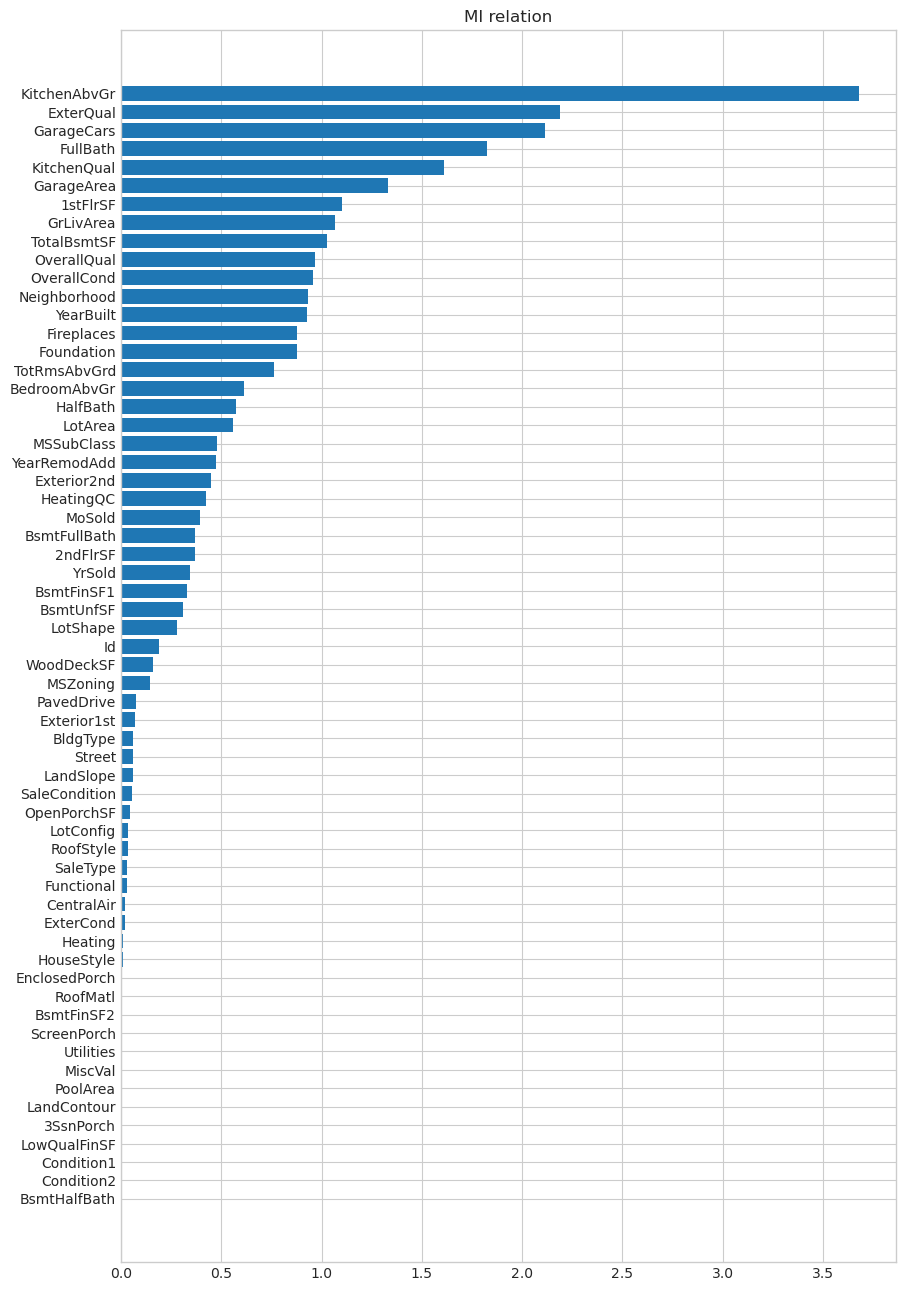

In [46]:
plt.figure(dpi=100, figsize=(10, 16))
plot_mi(minfo_df, 'MI', 'Features', "MI relation")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


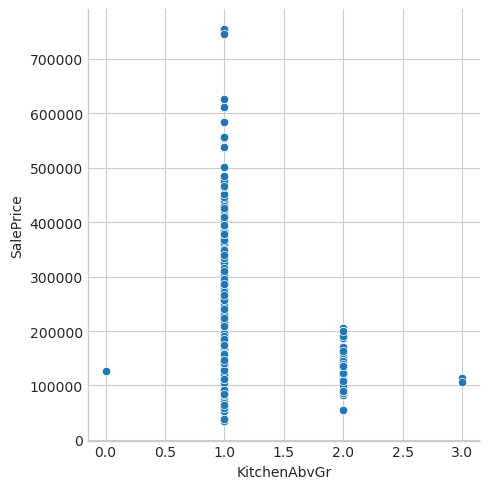

In [47]:
sns.relplot(x='KitchenAbvGr', y='SalePrice', data=df_train_filt);

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


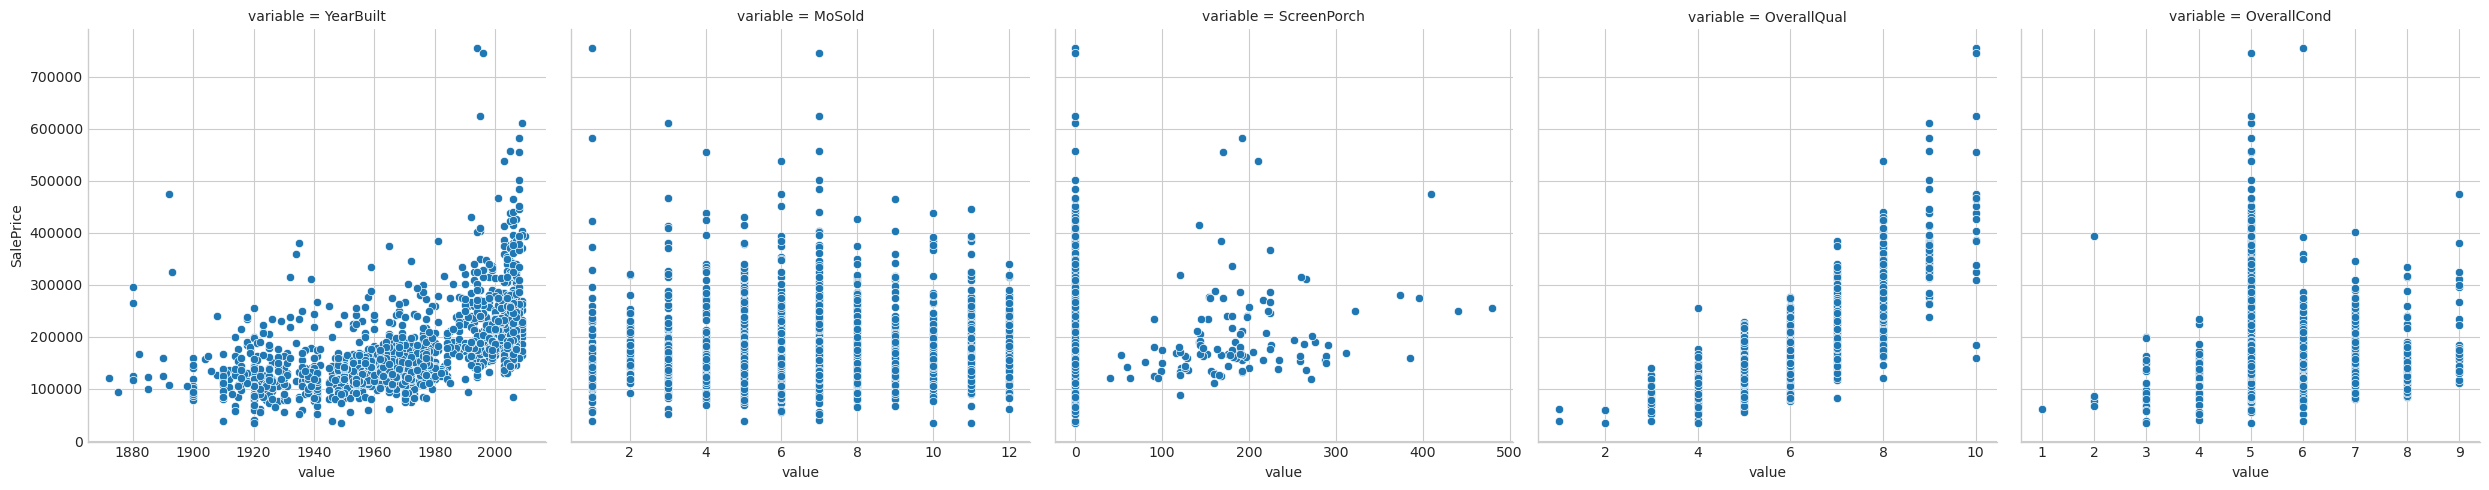

In [36]:
features = ["YearBuilt", "MoSold", "ScreenPorch", "OverallQual", "OverallCond"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df_train.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [37]:
np.sort(minfo, axis=None)
minfo


array([1.89848527e-01, 4.80010633e-01, 1.43633492e-01, 5.59369821e-01,
       5.78374577e-02, 2.78410875e-01, 0.00000000e+00, 0.00000000e+00,
       3.69321725e-02, 5.76298423e-02, 9.33532822e-01, 0.00000000e+00,
       0.00000000e+00, 6.16978023e-02, 1.14536411e-02, 9.65344701e-01,
       9.56573702e-01, 9.29309367e-01, 4.73982781e-01, 3.34595796e-02,
       6.46539680e-03, 6.97358234e-02, 4.49171592e-01, 2.18770394e+00,
       1.97321199e-02, 8.75259012e-01, 3.30423044e-01, 2.77119331e-03,
       3.10376321e-01, 1.02837182e+00, 1.23001537e-02, 4.23500048e-01,
       2.09302197e-02, 1.10395323e+00, 3.68148116e-01, 0.00000000e+00,
       1.06531843e+00, 3.69074731e-01, 0.00000000e+00, 1.82230166e+00,
       5.74241235e-01, 6.12752738e-01, 3.67953710e+00, 1.61198161e+00,
       7.64369666e-01, 3.05148675e-02, 8.78392902e-01, 2.11154566e+00,
       1.33092149e+00, 7.40638471e-02, 1.57217924e-01, 4.40517578e-02,
       7.29642347e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [38]:
minfo = minfo.reshape(-1, 1)
np.round(minfo)
minfo

array([[1.89848527e-01],
       [4.80010633e-01],
       [1.43633492e-01],
       [5.59369821e-01],
       [5.78374577e-02],
       [2.78410875e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.69321725e-02],
       [5.76298423e-02],
       [9.33532822e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [6.16978023e-02],
       [1.14536411e-02],
       [9.65344701e-01],
       [9.56573702e-01],
       [9.29309367e-01],
       [4.73982781e-01],
       [3.34595796e-02],
       [6.46539680e-03],
       [6.97358234e-02],
       [4.49171592e-01],
       [2.18770394e+00],
       [1.97321199e-02],
       [8.75259012e-01],
       [3.30423044e-01],
       [2.77119331e-03],
       [3.10376321e-01],
       [1.02837182e+00],
       [1.23001537e-02],
       [4.23500048e-01],
       [2.09302197e-02],
       [1.10395323e+00],
       [3.68148116e-01],
       [0.00000000e+00],
       [1.06531843e+00],
       [3.69074731e-01],
       [0.00000000e+00],
       [1.82230166e+00],


# Test set

In [ ]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.DataFrame(test)

nan_counts = df_test.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 